# Understanding our Data
Before doing anything on the data we need to get basic information on the data

In [2]:
import pandas as pd
import numpy as np
import datetime 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [3]:
import scipy.stats
from IPython import display
from ipywidgets import interact, widgets

import re
import mailbox
import csv
import seaborn as sns
from pandas import Series, DataFrame

In [4]:
import seaborn as sns

# Data Set 1

In [5]:
# to clean up the data i will make the Unnamed: 0 column as my unique index.
df = pd.read_csv('data/tmdb.movies.csv', index_col='Unnamed: 0')
df.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [6]:
df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


# Now i want to get important columns and cleaning the data

In [8]:
# replacing zeros with numpy NaN

df['popularity'] = df['popularity'].replace(0, np.nan)

df['vote_average'] = df['vote_average'].replace(0, np.nan)

df['vote_count'] = df['vote_count'].replace(0, np.nan)

# getting only the year in release_date to make things simpler

# Coercion is the implicit conversion of an instance of one type to another 
# during an operation which involves two arguments of the same type.
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-') 
                                                                       [0] if x != np.nan else np.nan)

In [9]:
df['vote_count'] = df['vote_count'].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26381 non-null  float64
 8   vote_count         26517 non-null  float64
 9   year               26517 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.2+ MB


# Lets get to cleaning.
one problem with the dataframe is that some columnsgs are not very usable for analysis. this is melting each row into multiple ones, each of which represent a single ranking. 

for simplicity i will work with a subset of the columns. 

In [11]:
# creating a new dataframe, double brackets to select the columns i want.
new_df = df[['id', 'title', 'popularity', 'vote_average', 'vote_count', 'year']]

In [12]:
new_df.head()

,id,title,popularity,vote_average,vote_count,year
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788.0,2010
1,10191,How to Train Your Dragon,28.734,7.7,7610.0,2010
2,10138,Iron Man 2,28.515,6.8,12368.0,2010
3,862,Toy Story,28.005,7.9,10174.0,1995
4,27205,Inception,27.920,8.3,22186.0,2010


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            26517 non-null  int64  
 1   title         26517 non-null  object 
 2   popularity    26517 non-null  float64
 3   vote_average  26381 non-null  float64
 4   vote_count    26517 non-null  float64
 5   year          26517 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.4+ MB


In [14]:
# check the unique values in the year column
new_df.year.unique()

array(['2010', '1995', '2009', '1999', '2004', '2002', '1998', '2007',
       '1959', '1986', '2000', '1985', '2008', '1956', '1976', '2005',
       '2012', '2011', '1996', '1970', '2014', '1974', '2013', '2006',
       '1994', '1997', '1982', '1984', '1980', '1991', '1993', '2003',
       '1983', '2015', '1936', '2017', '2016', '1967', '2001', '1992',
       '1987', '1988', '1966', '1961', '1989', '1946', '1972', '1979',
       '1930', '1949', '1981', '2018', '2019', '1977', '1962', '1933',
       '1965', '1968', '1957', '1958', '1964', '1960', '1978', '1975',
       '2020', '1939'], dtype=object)

In [15]:
# filter by certain year. so i will make a list of the years i want
years = ['1939', '1946', '1957', '1968', '1970', '1980', '1991',  '2002', '2020']

# set a new filter and using the .isin method i pass in the above lis
filt_years = new_df['year'].isin(years)

In [16]:
new_df.loc[filt_years, 'year']

20       2002
525      1970
2512     1980
2546     1991
2555     1980
5216     2002
5311     2002
6172     1970
11192    1946
14173    2002
17395    1991
18117    1980
20327    1980
20626    2002
20639    1991
22417    1980
23872    1968
24082    2002
24211    1957
24375    1968
24441    1968
24742    1991
26057    2020
26345    1939
Name: year, dtype: object

In [17]:
new_df.sort_values(['id', 'title', 'popularity', 'vote_average'])
new_df.head(10)

,id,title,popularity,vote_average,vote_count,year
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788.0,2010
1,10191,How to Train Your Dragon,28.734,7.7,7610.0,2010
2,10138,Iron Man 2,28.515,6.8,12368.0,2010
3,862,Toy Story,28.005,7.9,10174.0,1995
4,27205,Inception,27.920,8.3,22186.0,2010
5,32657,Percy Jackson & the Olympians: The Lightning T...,26.691,6.1,4229.0,2010
6,19995,Avatar,26.526,7.4,18676.0,2009
7,10193,Toy Story 3,24.445,7.7,8340.0,2010
8,20352,Despicable Me,23.673,7.2,10057.0,2010
9,38055,Megamind,22.855,6.8,3635.0,2010


In [18]:
# a very common use for filtering is using string methods within pandas-
# to do some alterations within the dataframe.
filt_titles = new_df['title'].str.contains('Iron Man 2', na=False)

In [19]:
new_df.loc[filt_titles, 'title']

2    Iron Man 2
Name: title, dtype: object

In [20]:
# analyse the popularity and vote_average aspects below.
new_df[new_df['popularity'].notnull()][['id','title','popularity', 'vote_average', 'vote_count', 'year']].sort_values('popularity',
                                                                                                                 ascending=False).head(10)

# Below is the Top 10 movies with Highest popularity. 

,id,title,popularity,vote_average,vote_count,year
23811,299536,Avengers: Infinity War,80.773,8.3,13948.0,2018
11019,245891,John Wick,78.123,7.2,10081.0,2014
23812,324857,Spider-Man: Into the Spider-Verse,60.534,8.4,4048.0,2018
11020,122917,The Hobbit: The Battle of the Five Armies,53.783,7.3,8392.0,2014
5179,24428,The Avengers,50.289,7.6,19673.0,2012
11021,118340,Guardians of the Galaxy,49.606,7.9,17958.0,2014
20617,335984,Blade Runner 2049,48.571,7.4,6679.0,2017
23813,335984,Blade Runner 2049,48.571,7.4,6679.0,2017
23814,338952,Fantastic Beasts: The Crimes of Grindelwald,48.508,6.9,4870.0,2018
23815,404368,Ralph Breaks the Internet,48.057,7.2,2626.0,2018


In [21]:
# You can get Movies with lowest popularity by just replacing head() with tail()
new_df[new_df['popularity'].notnull()][['id','title','popularity', 'vote_average', 'vote_count', 'year']].sort_values('popularity',
                                                                                                                 ascending=False).tail(10)

,id,title,popularity,vote_average,vote_count,year
13872,408529,Cooped,0.6,5.0,1.0,2014
13873,407998,Platonic Solid,0.6,5.0,1.0,2014
13874,406698,The Scanners Way: Creating the Special Effects...,0.6,5.0,1.0,2014
13875,406339,L Word Mississippi: Hate the Sin,0.6,5.0,1.0,2014
13876,402224,Send,0.6,5.0,1.0,2014
13877,401741,Crème Caramel,0.6,5.0,1.0,2014
13878,401427,Elegy,0.6,5.0,1.0,2014
13879,399054,Jaguar,0.6,5.0,1.0,2014
13880,381154,Unleashed! A Dog Dancing Story,0.6,5.0,1.0,2014
26516,309885,The Church,0.6,NaN,1.0,2018


<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

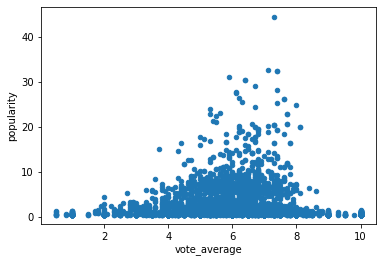

In [29]:
new_df[new_df.year == "2015"].plot.scatter('vote_average', 'popularity')

# Now I will focus on Vote Count, Vote average and Popularity of movies.

 Get Top 10 Movies with Most vote counts and Max vote average.

In [30]:
# movies with max vote count
new_df[new_df['vote_count'].notnull()][['id','title','popularity','vote_count','year']].sort_values('vote_count',
                                                                                            ascending=False).head(10)

# below i can see that Inception comes in first place with 22,186 votes!

,id,title,popularity,vote_count,year
4,27205,Inception,27.920,22186.0,2010
17383,293660,Deadpool,35.067,20175.0,2016
5179,24428,The Avengers,50.289,19673.0,2012
6,19995,Avatar,26.526,18676.0,2009
11032,157336,Interstellar,28.440,18597.0,2014
11021,118340,Guardians of the Galaxy,49.606,17958.0,2014
5189,68718,Django Unchained,21.260,15725.0,2012
5235,70160,The Hunger Games,14.212,14587.0,2012
14177,76341,Mad Max: Fury Road,28.099,14454.0,2015
7881,68721,Iron Man 3,32.093,14155.0,2013


In [31]:
# While extracting vote_average i need to consider movies with atleast 3000 votes to be a fare data.
# movies with highest vote_average
new_df[new_df['vote_count'] > 3000][['id','title','popularity','vote_average','year']].sort_values('vote_average',
                                                                                            ascending=False).head(10)
# here i have Your Name as at the top of the list.
# i can also see duplicates, but i noticed that the index's are different so i might not-
# want to drop them yet. 

,id,title,popularity,vote_average,year
17389,372058,Your Name.,28.238,8.6,2017
20632,372058,Your Name.,28.238,8.6,2017
23861,424,Schindler's List,25.334,8.5,1993
20626,129,Spirited Away,32.043,8.5,2002
14173,129,Spirited Away,32.043,8.5,2002
11031,244786,Whiplash,28.784,8.4,2014
23812,324857,Spider-Man: Into the Spider-Verse,60.534,8.4,2018
23827,490132,Green Book,36.284,8.3,2018
20660,398818,Call Me by Your Name,20.504,8.3,2017
23811,299536,Avengers: Infinity War,80.773,8.3,2018


In [32]:
# get the most popular movies of all time. 
new_df[new_df['popularity'].notnull()][['title','popularity']].sort_values('popularity',ascending=False).head(10)


,title,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289
11021,Guardians of the Galaxy,49.606
20617,Blade Runner 2049,48.571
23813,Blade Runner 2049,48.571
23814,Fantastic Beasts: The Crimes of Grindelwald,48.508
23815,Ralph Breaks the Internet,48.057


In [33]:
# get the least popular movies of all time. 
new_df[new_df['popularity'].notnull()][['title','popularity']].sort_values('popularity',ascending=False).tail(10)

,title,popularity
13872,Cooped,0.6
13873,Platonic Solid,0.6
13874,The Scanners Way: Creating the Special Effects...,0.6
13875,L Word Mississippi: Hate the Sin,0.6
13876,Send,0.6
13877,Crème Caramel,0.6
13878,Elegy,0.6
13879,Jaguar,0.6
13880,Unleashed! A Dog Dancing Story,0.6
26516,The Church,0.6


In [34]:
new_df['vote_average'].unique()

array([ 7.7,  6.8,  7.9,  8.3,  6.1,  7.4,  7.2,  7.5,  6.6,  6. ,  6.7,
        4.5,  7.3,  8.1,  6.3,  4.6,  5.7,  5.9,  8.2,  6.2,  6.4,  7.6,
        6.5,  7.1,  5.6,  5.3,  7. ,  5.8,  4.9,  5.1,  5.5,  6.9,  5.4,
        7.8,  4.7,  4.1,  4.8,  3.2,  8. ,  3.7,  5.2,  2.7,  4.4,  5. ,
        2.9,  2. ,  4. ,  4.2,  3.9,  4.3,  3.5,  3.8,  3.6,  3.4,  3.3,
        3.1,  3. ,  2.5,  2.6, 10. ,  2.2,  1.7,  2.8,  2.3,  1.6,  1.8,
        2.4,  1.5,  8.6,  1.9,  9. ,  8.7,  0.5,  1. ,  8.4,  2.1,  8.8,
        1.3,  9.5,  8.5,  9.8,  nan,  8.9,  9.3,  9.4,  9.2,  0.8,  1.2,
        1.4,  9.1,  9.7])

In [35]:
vote_pop = new_df[['vote_average', 'popularity']].head(20).sort_values(by=['vote_average'])

In [41]:
vote_pop[['vote_average', 'popularity']].median()

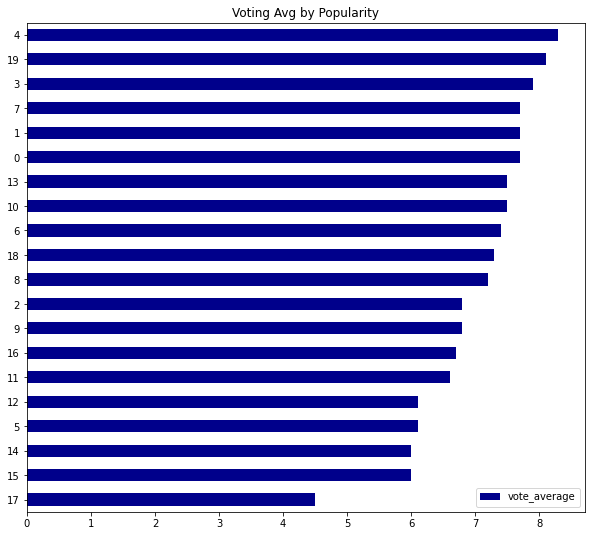

In [44]:
# the genres with the high voting average
vote_pop[['vote_average']].plot.barh(stacked=True, title ='Voting Avg by Popularity',color='DarkBlue', figsize=(10, 9));

# Data Set 2

which studio makes the most money by year?

In [45]:
df2 = pd.read_csv('data/bom.movie_gross.csv')
df2.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [47]:
# drop duplicate values
df2.drop_duplicates(inplace=True)

In [48]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.8+ KB


In [49]:
df2.dropna(subset=['foreign_gross'], inplace=True)

In [50]:
# replacing zeros with numpy NaN
df2['domestic_gross'] = df2['domestic_gross'].replace(0, np.nan)

In [51]:
df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            2037 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.5+ KB


In [53]:
# have to convert 'foreign_gross' to numeric because right now its a list
df2['foreign_gross'] = pd.to_numeric(df2['foreign_gross'], errors='coerce')

In [54]:
df2.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010
6,Iron Man 2,Par.,312400000.0,311500000.0,2010
7,Tangled,BV,200800000.0,391000000.0,2010
8,Despicable Me,Uni.,251500000.0,291600000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010


In [55]:
df2.info()
# everything is in the data types i want.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            2037 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.5+ KB


In [56]:
# top movies with the greates domestic gross
df2[df2['domestic_gross'].notnull()][['title','studio','domestic_gross','foreign_gross','year']].sort_values('domestic_gross',
                                                                                                                 ascending=False).head(10)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,NaN,2018
1873,Jurassic World,Uni.,652300000.0,NaN,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017
3082,Incredibles 2,BV,608600000.0,634200000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017
2324,Finding Dory,BV,486300000.0,542300000.0,2016


In [57]:
df2 ['total_gross'] = df2['domestic_gross'] + df2['foreign_gross']

In [58]:
df2.isnull().sum()

title              0
studio             4
domestic_gross    28
foreign_gross      5
year               0
total_gross       33
dtype: int64

In [59]:
df2

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


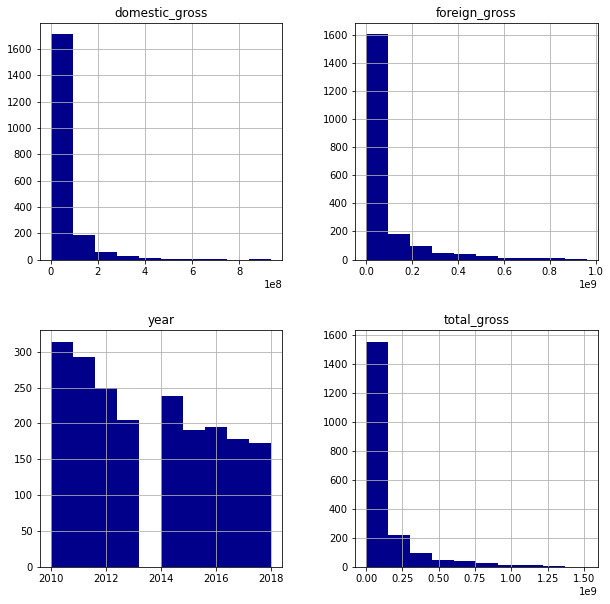

In [60]:
df2.hist(color='DarkBlue',figsize= (10,10));

# domestic, foreign, and total are skewed. 

<AxesSubplot:xlabel='year'>

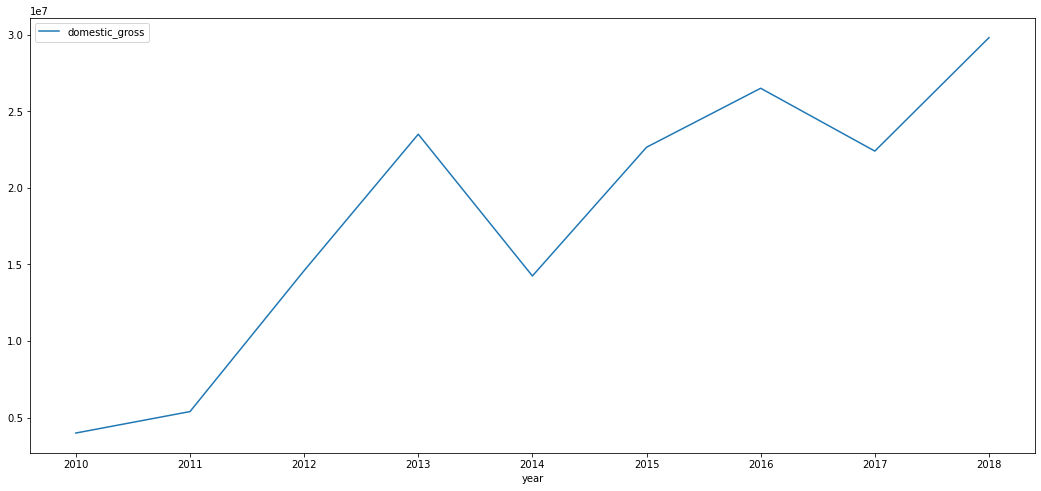

In [61]:
dom_revenue = (df2[df2['domestic_gross'].notnull()][['year', 'domestic_gross']].groupby('year').median())
dom_revenue.plot(figsize=(18,8))

<AxesSubplot:xlabel='year'>

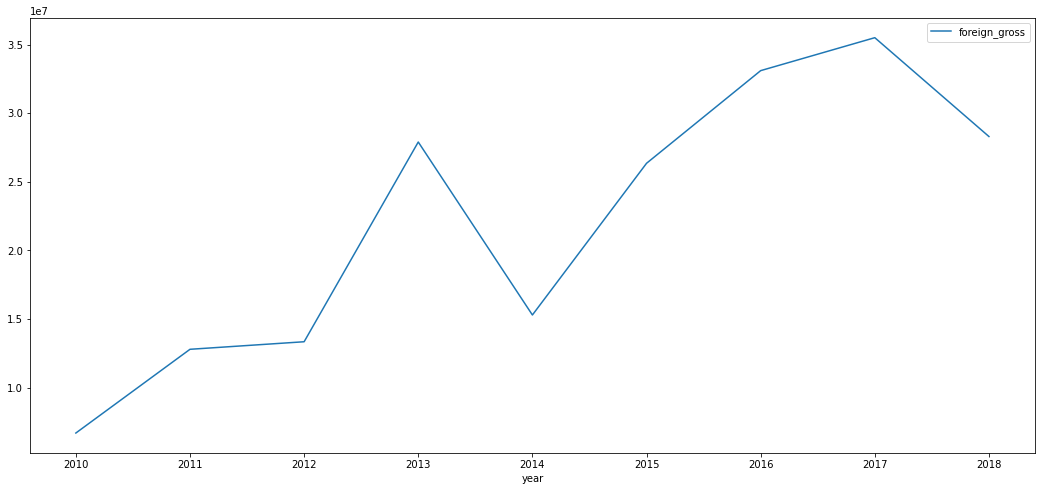

In [62]:
for_revenue = (df2[df2['foreign_gross'].notnull()][['year', 'foreign_gross']].groupby('year').median())
for_revenue.plot(figsize=(18,8))

<AxesSubplot:xlabel='year'>

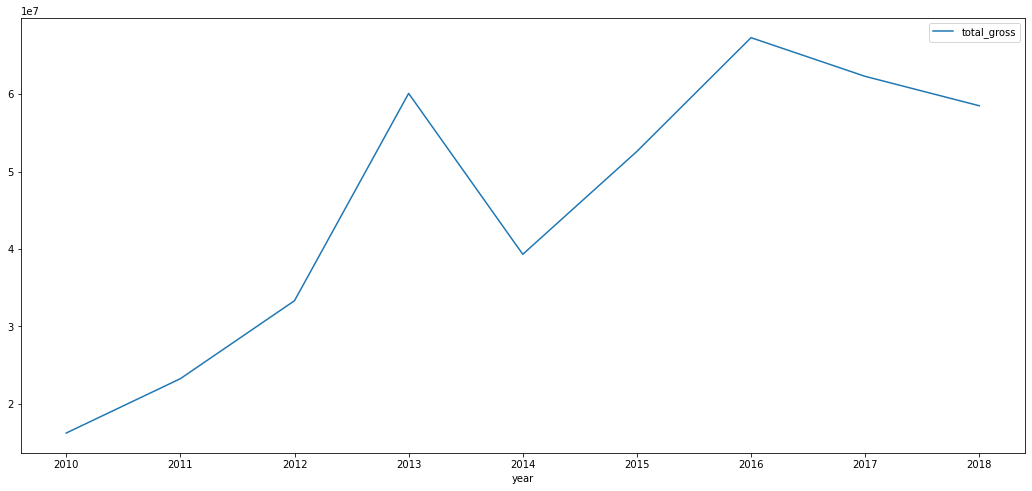

In [63]:
total_revenue = (df2[df2['total_gross'].notnull()][['year', 'total_gross']].groupby('year').median())
total_revenue.plot(figsize=(18,8))

In [64]:
# the median values for the domestic gross from years 2010-2018
dom_revenue

,domestic_gross
year,
2010,4000000.0
2011,5400000.0
2012,14600000.0
2013,23500000.0
2014,14250000.0
2015,22650000.0
2016,26500000.0
2017,22400000.0
2018,29800000.0


In [65]:
# the median values for the foreign gross from years 2010-2018
for_revenue

,foreign_gross
year,
2010,6700000.0
2011,12800000.0
2012,13350000.0
2013,27900000.0
2014,15300000.0
2015,26350000.0
2016,33100000.0
2017,35500000.0
2018,28300000.0


In [66]:
# the median values for the total revenues from years 2010-2018
total_revenue

,total_gross
year,
2010,16195000.0
2011,23220000.0
2012,33300000.0
2013,60100000.0
2014,39300000.0
2015,52600000.0
2016,67300000.0
2017,62300000.0
2018,58500000.0


In [67]:
df2.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08


In [75]:
df2.sort_values(by=['domestic_gross', 'title'], ascending=False).head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015,NaN
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3079,Avengers: Infinity War,BV,678800000.0,NaN,2018,NaN
1873,Jurassic World,Uni.,652300000.0,NaN,2015,NaN
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
2324,Finding Dory,BV,486300000.0,542300000.0,2016,1.028600e+09


In [74]:
df2.sort_values(by=['foreign_gross', 'title'], ascending=False).head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017,8.703000e+08
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014,1.104000e+09
1876,Minions,Uni.,336000000.0,823400000.0,2015,1.159400e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


array([[<AxesSubplot:title={'center':'domestic_gross'}>]], dtype=object)

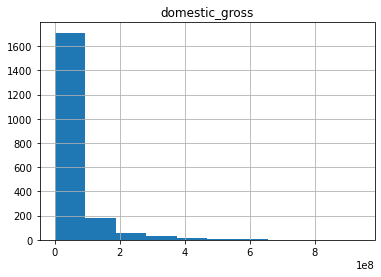

In [76]:
df2.hist(column='domestic_gross')

array([[<AxesSubplot:title={'center':'foreign_gross'}>]], dtype=object)

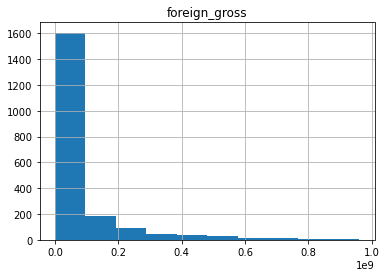

In [77]:
df2.hist(column='foreign_gross')

In [78]:
# Overall Descriptive statistics
df2.describe()

,domestic_gross,foreign_gross,year,total_gross
count,2.009000e+03,2.032000e+03,2037.000000,2.004000e+03
mean,4.697311e+07,7.505704e+07,2013.492882,1.215769e+08
std,8.159966e+07,1.375294e+08,2.592412,2.061554e+08
min,4.000000e+02,6.000000e+02,2010.000000,4.900000e+03
25%,6.650000e+05,3.775000e+06,2011.000000,8.117750e+06
50%,1.650000e+07,1.890000e+07,2013.000000,4.210000e+07
75%,5.600000e+07,7.505000e+07,2016.000000,1.327250e+08
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


In [79]:
# Get movies with highest domestic_gross, foreign_gross, total_gross 
df2.nlargest(3, 'domestic_gross')

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015,NaN
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3079,Avengers: Infinity War,BV,678800000.0,NaN,2018,NaN


In [80]:
df2.nlargest(3, 'foreign_gross')

,title,studio,domestic_gross,foreign_gross,year,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09


In [81]:
df2.nlargest(3, 'total_gross')

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09


In [82]:
# Get movies made per year, create new data frame
made_year = pd.DataFrame(df2.groupby('year').title.nunique())
made_year

,title
year,
2010,314
2011,293
2012,250
2013,205
2014,238
2015,191
2016,195
2017,178
2018,173


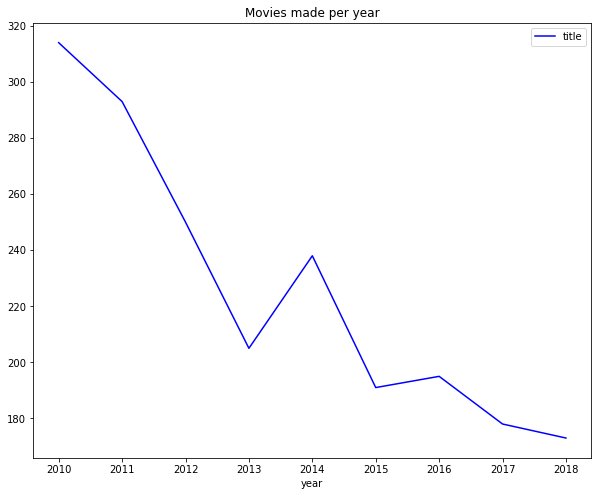

In [83]:
# Plot data, line chart for showing development over the years
made_year.plot.line(title ='Movies made per year', color='Blue',figsize=(10, 8));

# Data Set 3

In [1]:
import pandas as pd
import numpy as np
import datetime 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
import scipy.stats
from IPython import display
from ipywidgets import interact, widgets

import re
import mailbox
import csv
import seaborn as sns
from pandas import Series, DataFrame


In [3]:
# THIS IS WHERE I LEFT OFF. CHANGE THE DATETIMES

movie_info = pd.read_csv('data/rt.movie_info.tsv', sep="\t")
movie_info.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [4]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [5]:
# turning the theater_date column into a datetime object
movie_info['theater_date'] = pd.to_datetime(movie_info['theater_date'], format='%b %d, %Y')

In [6]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,"Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaN,NaN,NaN,200 minutes,NaN


In [7]:
# i confirm that the dates are a datetime object
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1498 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   object        
 8   currency      340 non-null    object        
 9   box_office    340 non-null    object        
 10  runtime       1530 non-null   object        
 11  studio        494 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 146.4+ KB


In [8]:
# DONT RUN THIS CELL YET
# i only want the year so i will strip evrything else
# movie_info['theater_date'].apply(lambda x: str(x).split('-') [0] if x != np.nan else np.nan)

In [9]:
# now i can use the datetime methods to my advantage.
movie_info['theater_date'].dt.day_name()

0       Saturday
1         Friday
2         Friday
3         Friday
4            NaN
          ...   
1555      Friday
1556      Friday
1557      Monday
1558    Thursday
1559    Thursday
Name: theater_date, Length: 1560, dtype: object

In [10]:
# now i can create another column so that i can refrence what day the movies came out.
# i can simply make a column with these days
movie_info['day_of_week'] = movie_info['theater_date'].dt.day_name()

In [11]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,day_of_week
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104 minutes,NaN,Saturday
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Friday
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,116 minutes,NaN,Friday
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,"Aug 27, 1997",NaN,NaN,128 minutes,NaN,Friday
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaN,NaN,NaN,200 minutes,NaN,NaN


In [12]:
movie_info['day_of_week'].value_counts()

Friday       702
Wednesday    169
Thursday      95
Saturday      76
Monday        60
Tuesday       53
Sunday        46
Name: day_of_week, dtype: int64

In [13]:
# i want to view the earliest date in this data and max
movie_info['theater_date'].min()

Timestamp('1921-01-01 00:00:00')

In [14]:
movie_info['theater_date'].max()

Timestamp('2018-10-19 00:00:00')

In [15]:
# i can also subtract dates in order to view the time between those two dates
# this is called time delta
movie_info['theater_date'].max() - movie_info['theater_date'].min()

# pretty cool to see how many days are between 1921 and 2018!

Timedelta('35720 days 00:00:00')

In [16]:
movie_info = movie_info.dropna(subset=['box_office'])

In [17]:
movie_info['box_office'].isnull().sum()

0

In [18]:
# now i can apply filters to my time data
# i want to view data for just 2018
# date_filt = (movie_info['theater_date'] == '2018')
# movie_info.loc[date_filt]

In [19]:
# making a new dataframe with the subset of columns 'box_office', 'theater_date', 'day_of_week'
# i want to analyze this data and find what is the best day to relaese a movie at the theater-
# so that it increases box office sales.
cols= [movie_info.columns[9], movie_info.columns[12]]
subset = movie_info[cols]
subset.head(20)

,box_office,day_of_week
1,"600,000",Friday
6,"41,032,915",Friday
7,"224,114",Thursday
8,"134,904",Wednesday
15,"1,039,869",Friday
16,"99,165,609",Friday
18,"20,518,224",Wednesday
19,"1,971,135",Friday
28,"312,136",Friday
29,"201,010",Friday


In [20]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   box_office   340 non-null    object
 1   day_of_week  334 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [21]:
# basic stats for all the days in the week
subset.describe()

,box_office,day_of_week
count,340,334
unique,336,7
top,"200,000",Friday
freq,2,283


In [22]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   box_office   340 non-null    object
 1   day_of_week  334 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [23]:
subset['day_of_week'].value_counts()

Friday       283
Wednesday     32
Thursday      10
Monday         4
Tuesday        3
Sunday         1
Saturday       1
Name: day_of_week, dtype: int64

In [24]:
# filter by certain day. so i will make a list of the days i want
other_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday']
other_days_filt = subset['day_of_week'].isin(other_days)

In [25]:
week_day = subset.loc[other_days_filt, 'day_of_week']
week_day

7        Thursday
8       Wednesday
18      Wednesday
44      Wednesday
51      Wednesday
124     Wednesday
160      Saturday
246      Thursday
249     Wednesday
259     Wednesday
318     Wednesday
367     Wednesday
378     Wednesday
406     Wednesday
467     Wednesday
584     Wednesday
585     Wednesday
632        Monday
649      Thursday
657     Wednesday
670     Wednesday
674      Thursday
690     Wednesday
691     Wednesday
702      Thursday
787      Thursday
827     Wednesday
845      Thursday
893     Wednesday
913        Sunday
914     Wednesday
944      Thursday
966      Thursday
1102    Wednesday
1104    Wednesday
1154      Tuesday
1161      Tuesday
1173    Wednesday
1208    Wednesday
1239    Wednesday
1243       Monday
1274      Tuesday
1307    Wednesday
1323    Wednesday
1327     Thursday
1328    Wednesday
1378    Wednesday
1429       Monday
1458       Monday
1536    Wednesday
1537    Wednesday
Name: day_of_week, dtype: object

In [26]:
monday = subset[(subset['day_of_week'] == 'Monday') & (subset['box_office'])]

In [27]:
# basic stats for monday
monday.max()

box_office     32,700,000
day_of_week        Monday
dtype: object

In [28]:
fridays = subset[(subset['day_of_week'] == 'Friday') & (subset['box_office'])]

In [29]:
# basic stats for friday
fridays.max()

box_office     99,165,609
day_of_week        Friday
dtype: object

In [30]:
# Drop duplicates
movie_info.drop_duplicates(inplace=True)
# Check if done
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            340 non-null    int64         
 1   synopsis      340 non-null    object        
 2   rating        340 non-null    object        
 3   genre         340 non-null    object        
 4   director      299 non-null    object        
 5   writer        273 non-null    object        
 6   theater_date  334 non-null    datetime64[ns]
 7   dvd_date      334 non-null    object        
 8   currency      340 non-null    object        
 9   box_office    340 non-null    object        
 10  runtime       338 non-null    object        
 11  studio        305 non-null    object        
 12  day_of_week   334 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 37.2+ KB


In [31]:
#  Drop rows containing missing values in genre
movie_info.dropna(subset=['genre'], inplace=True)  
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            340 non-null    int64         
 1   synopsis      340 non-null    object        
 2   rating        340 non-null    object        
 3   genre         340 non-null    object        
 4   director      299 non-null    object        
 5   writer        273 non-null    object        
 6   theater_date  334 non-null    datetime64[ns]
 7   dvd_date      334 non-null    object        
 8   currency      340 non-null    object        
 9   box_office    340 non-null    object        
 10  runtime       338 non-null    object        
 11  studio        305 non-null    object        
 12  day_of_week   334 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 37.2+ KB


In [32]:
movie_info['box_office'] = pd.to_numeric(movie_info['box_office'].str.replace(",", ""))

In [33]:
movie_info['box_office']

1         600000
6       41032915
7         224114
8         134904
15       1039869
          ...   
1541    25335935
1542     1416189
1545       59371
1546      794306
1555    33886034
Name: box_office, Length: 340, dtype: int64

In [34]:
# Only keep columns that are needed for further analysis
movie_df = movie_info[['rating','genre','director','currency','box_office','theater_date', 'day_of_week']]
movie_df

,rating,genre,director,currency,box_office,theater_date,day_of_week
1,R,Drama|Science Fiction and Fantasy,David Cronenberg,$,600000,2012-08-17,Friday
6,PG-13,Comedy,Jake Kasdan,$,41032915,2002-01-11,Friday
7,R,Drama,Ray Lawrence,$,224114,2006-04-27,Thursday
8,R,Drama,Taylor Hackford,$,134904,2010-06-30,Wednesday
15,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,$,1039869,2010-12-17,Friday
...,...,...,...,...,...,...,...
1541,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,$,25335935,2005-09-30,Friday
1542,NR,Comedy|Drama,Gauri Shinde,$,1416189,2012-10-05,Friday
1545,R,Horror|Mystery and Suspense,Sebastian Gutierrez,$,59371,2007-06-01,Friday
1546,PG,Art House and International|Comedy|Drama,NaN,$,794306,2002-08-30,Friday


In [35]:
# Split genres and create a new entry for each of the genre a movie falls into
s = movie_df['genre'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del movie_df['genre']
movie_split_genres = movie_df.join(s)

In [36]:
movie_split_genres.head()

,rating,director,currency,box_office,theater_date,day_of_week,genres
1,R,David Cronenberg,$,600000,2012-08-17,Friday,Drama
1,R,David Cronenberg,$,600000,2012-08-17,Friday,Science Fiction and Fantasy
6,PG-13,Jake Kasdan,$,41032915,2002-01-11,Friday,Comedy
7,R,Ray Lawrence,$,224114,2006-04-27,Thursday,Drama
8,R,Taylor Hackford,$,134904,2010-06-30,Wednesday,Drama


In [37]:
# filling the $ for Nan for column currency
movie_split_genres['currency'].fillna('$', inplace=True)

In [38]:
movie_split_genres.head()

,rating,director,currency,box_office,theater_date,day_of_week,genres
1,R,David Cronenberg,$,600000,2012-08-17,Friday,Drama
1,R,David Cronenberg,$,600000,2012-08-17,Friday,Science Fiction and Fantasy
6,PG-13,Jake Kasdan,$,41032915,2002-01-11,Friday,Comedy
7,R,Ray Lawrence,$,224114,2006-04-27,Thursday,Drama
8,R,Taylor Hackford,$,134904,2010-06-30,Wednesday,Drama


In [39]:
movie_split_genres.isnull().sum()

rating            0
director        101
currency          0
box_office        0
theater_date     12
day_of_week      12
genres            0
dtype: int64

In [40]:
# renaming column runtime to Movie Length 
movie_split_genres.rename(columns={'runtime': 'Movie Length'}, inplace=True)

In [41]:
# using the groupby function on the director column

# first i will split the objects 
# then apply a function
# then combine those results 

# made this into a variable so that i dont have to write the same code
movie_dir = movie_split_genres.groupby(['director'])

# what i get back is a dataframe groupby object

In [42]:
# this returns a dataframe with the director info
# this is like running a filter on the original dataframe
movie_dir.get_group('William Friedkin')

,rating,director,currency,box_office,theater_date,day_of_week,genres
514,R,William Friedkin,$,1800000,2012-07-27,Friday,Comedy
514,R,William Friedkin,$,1800000,2012-07-27,Friday,Mystery and Suspense


In [43]:
# this filter gives me all the info based on the comedy genre in a pandas series
filt = movie_split_genres['genres'] == 'Comedy'
movie_split_genres.loc[filt].value_counts()

rating  director                  currency  box_office  theater_date  day_of_week  genres
R       William Friedkin          $         1800000     2012-07-27    Friday       Comedy    1
PG-13   Jake Kasdan               $         41032915    2002-01-11    Friday       Comedy    1
        Anthony Russo|Joe Russo   $         75604320    2006-07-13    Thursday     Comedy    1
        Brian Robbins             $         10279192    2004-01-30    Friday       Comedy    1
                                            39697363    2001-09-14    Friday       Comedy    1
                                                                                            ..
R       Glenn Ficarra|John Requa  $         18356529    2016-03-04    Friday       Comedy    1
        Goran Dukic               $         231512      2007-10-19    Friday       Comedy    1
        Harald Zwart              $         5689784     2001-04-27    Friday       Comedy    1
        Harmony Korine            $         13900000   

In [44]:
# since this returns a list of series, i can use the .loc and search for a desired-
# director by name. 
# this shows me that William Friedkin has directed 11 movies
movie_dir['director'].value_counts().loc['William Friedkin']

director
William Friedkin    2
Name: director, dtype: int64

In [45]:
# how many different genres do i have
movie_split_genres['genres'].unique()

array(['Drama', 'Science Fiction and Fantasy', 'Comedy',
       'Mystery and Suspense', 'Action and Adventure',
       'Art House and International', 'Musical and Performing Arts',
       'Horror', 'Kids and Family', 'Romance', 'Sports and Fitness',
       'Western', 'Documentary', 'Special Interest', 'Animation',
       'Cult Movies', 'Classics', 'Faith and Spirituality', 'Television'],
      dtype=object)

In [46]:
len(movie_split_genres['genres'].unique())

19

In [47]:
# using the groupby function on the genres column

# first i will split the objects 
# then apply a function
# then combine those results 

# made this into a variable so that i dont have to write the same code
movie_genres = movie_split_genres.groupby(['genres'])

# what i get back is a dataframe groupby object

In [48]:
# Which genres have high box office?
movie_genres.head().sort_values('box_office', ascending=True)

,rating,director,currency,box_office,theater_date,day_of_week,genres
970,NR,Erik Gandini,$,363,2009-08-28,Friday,Television
359,PG-13,Leon Gast,$,2367,2010-07-30,Friday,Special Interest
359,PG-13,Leon Gast,$,2367,2010-07-30,Friday,Documentary
189,R,Neil Jordan,$,84293,2013-06-28,Friday,Horror
189,R,Neil Jordan,$,84293,2013-06-28,Friday,Science Fiction and Fantasy
...,...,...,...,...,...,...,...
51,PG,Kevin Lima,$,127706877,2007-11-21,Wednesday,Kids and Family
165,PG-13,Gore Verbinski,$,128579698,2002-10-18,Friday,Romance
165,PG-13,Gore Verbinski,$,128579698,2002-10-18,Friday,Horror
44,R,NaN,$,132088910,2012-11-21,Wednesday,Comedy


In [49]:
# lets plot this!
# i will just make a varible that holds the above datafframe
top_genres = movie_genres.head().sort_values('box_office', ascending=True).head(20)

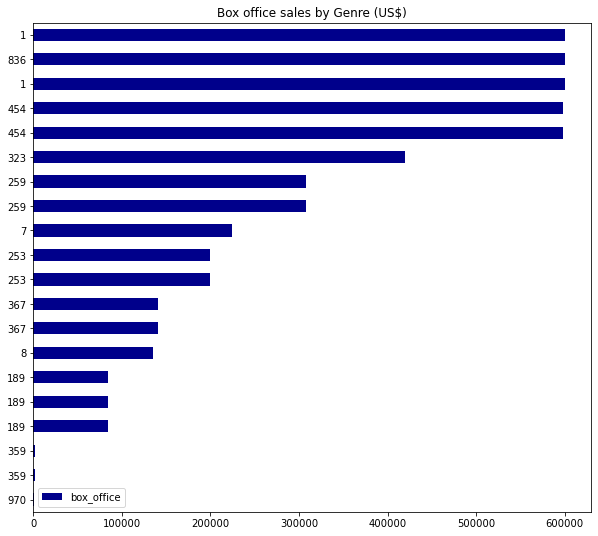

In [50]:
top_genres[['box_office']].plot.barh(stacked=False, title = 'Box office sales by Genre (US$)',
                                               color=('DarkBlue'), figsize=(10, 9));

In [51]:
movie_genres['box_office'].mean()

genres
Action and Adventure           6.232875e+07
Animation                      5.619246e+07
Art House and International    2.222098e+06
Classics                       6.750000e+06
Comedy                         4.191096e+07
Cult Movies                    1.390000e+07
Documentary                    1.185648e+07
Drama                          2.825376e+07
Faith and Spirituality         5.380785e+06
Horror                         2.638568e+07
Kids and Family                5.469997e+07
Musical and Performing Arts    1.092591e+07
Mystery and Suspense           4.255492e+07
Romance                        4.826660e+07
Science Fiction and Fantasy    8.094787e+07
Special Interest               3.101610e+06
Sports and Fitness             2.124168e+07
Television                     1.345684e+07
Western                        1.443617e+07
Name: box_office, dtype: float64

In [52]:
movie_genres['box_office'].median()

genres
Action and Adventure           35764982.0
Animation                      42194060.0
Art House and International     1089802.0
Classics                        6750000.0
Comedy                         17364602.0
Cult Movies                    13900000.0
Documentary                      419361.0
Drama                           8696268.5
Faith and Spirituality          4894004.0
Horror                         19755422.0
Kids and Family                39764012.0
Musical and Performing Arts     4894004.0
Mystery and Suspense           17230619.5
Romance                        22701447.5
Science Fiction and Fantasy    33075902.0
Special Interest                 308164.0
Sports and Fitness             21241679.0
Television                      2927972.0
Western                         7200000.0
Name: box_office, dtype: float64